V3: This notebook will have different models to answer different questions

1. What is the zip code with the higher house prices? 


## Final Project Submission

Please fill out:
* Student name: Francis Morales
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


In [1]:
#Make notebook wider
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# 1. Inspecting, Cleaning and Preparing the Dataset

### 1.1 Use the dataframe.info(), dataframe.describe(), dataframe.isna() methods and print unique values to get an inital sense of the data. Remove duplicate data.

* ['waterfront', 'view', 'yr_renovated'] --> missing values, need to inspect further
* ['date', 'sqft_basement'] --> are saved as object, might have to convert to a different value_type
* ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'] --> Might be able to convert those variables to categories
* 177 rows with duplicate data were identified and removed from dataset.


In [36]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('kc_house_data.csv')

In [37]:
#Check for duplicated data
duplicates = df[df.duplicated(subset='id')]
print(len(duplicates))

177


In [38]:
df.drop_duplicates(subset='id', keep='first', inplace=True)
#Check the new number of rows
df['id'].count()

21420

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Check the number of NaNs in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Examine the unique values in each column to look for placeholders or unlikely data
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
2592400250    0.000047
6772200055    0.000047
9808700025    0.000047
2595650170    0.000047
2423059067    0.000047
Name: id, dtype: float64 

date 
 6/23/2014     0.006629
6/26/2014     0.006116
6/25/2014     0.006116
7/8/2014      0.005929
4/27/2015     0.005882
3/25/2015     0.005696
7/9/2014      0.005649
4/14/2015     0.005602
6/24/2014     0.005556
10/28/2014    0.005462
Name: date, dtype: float64 

price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
325000.0    0.006863
400000.0    0.006769
375000.0    0.006443
525000.0    0.006116
300000.0    0.006116
Name: price, dtype: float64 

bedrooms 
 3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.249860
1

### 1.2 Further inspect the data looking for NaNs and placeholder values. Apply data cleaning procedures described in notes below. Convert variables to appropriate data types.
   
* ['waterfront']: median = 0 // 99% of the houses with data have ['waterfront'] = 0; therefore, for the NaNs in this variable, I will be assigning ['waterfront'] = 0
* ['view']: median = 0 // 90% of the houses with data have ['view']= 0; therefore, I will be assigning ['view'] = 0 to the NaNs in this variable.
* ['yr_renovated']: median = 0 // 95.7% of the houses with data have ['yr_renovated'] = 0; therefore, for the NaNs in this variable I will be assigning ['yr_renovated'] = 0
* ['yr_renovated']: will transform this variable into a categorical one where ['yr_renovated']=0 if not renovated and ['yr_renovated']=1 if renovated -- this based on 95% of houses have never been renovated and makes more sense to transform to a category
* ['sqft_basement'] has a placeholder "?" representing 2% of the total values. Will calculate the median value of the houses with data and will replace with the calculated median value.
* Data Type transformation:
        -['date']: apply pandas.to_datetime
        -['waterfront', 'yr_renovated', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']: change to category


In [39]:
#Handling NaNs
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#Handling placeholder value in 'sqft_basement'
df2 = df.loc[df['sqft_basement'] != '?'].copy()
df2['sqft_basement'] = pd.to_numeric(df2['sqft_basement'])
median1 = df2['sqft_basement'].median()
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = median1
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

#Converting values != 0 into 1 for 'yr_renovated'
df['yr_renovated'].loc[df['yr_renovated'] != 0] = 1

#Handling data type in date
df['date'] = pd.to_datetime(df['date'])
df['zipcode'] = df['zipcode'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['yr_renovated'] = df['yr_renovated'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 1.3 Create dummy variables for categorical data

* Categorical variables should be converted into dummy variables before sticking them in the OLS model

In [40]:
#yr_built
bins = [1900, 1952, 1975, 1997, 2015]
bins_yr_built = pd.cut(df['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()

#Converting variables to category columns using "get_dummies" pandas method (as described in section 1.2)
yr_built_dummies = pd.get_dummies(bins_yr_built, prefix='yr_built')
yr_renovated_dummies = pd.get_dummies(df['yr_renovated'], prefix='yr_renovated')
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')
waterfront_dummies =  pd.get_dummies(df['waterfront'], prefix='waterfr')
view_dummies =  pd.get_dummies(df['view'], prefix='view')
condition_dummies =  pd.get_dummies(df['condition'], prefix='condit')
grade_dummies =  pd.get_dummies(df['grade'], prefix='grade')

# df = df.drop(['yr_built', 'yr_renovated', 'zipcode', 'waterfront', 'view', 'condition', 'grade'], axis=1)
# df = pd.concat([df, yr_built_dummies, yr_renovated_dummies, zipcode_dummies, waterfront_dummies, view_dummies, condition_dummies, grade_dummies], axis=1)

df_model = df[['price', 'sqft_lot', 'sqft_living']].copy()
df_model = pd.concat([df_model, zipcode_dummies], axis=1) 
df_model = df_model.drop(['zipcode_98039'], axis=1) #dropped the zipcode with lowest data available since we created categories


# 2. Case Study 1: Whats Zip Code Area has the best house appraisal?

### 2.1 Select the variables to use in Case Study 1, check correlation and drop conflicting variables
   * **Model1.**
            R-squared: 0.731, Adjusted R2: 0.730, Skeweness: 4.386, Kurtosis:57.821, Jarque-Bera:2750887.254
   * **Model2.** Log transformed my continuous variables to help normalize distribution. 
           R-squared: 0.826, Adjusted R2: 0.825, Skeweness: 0.241, Kurtosis:5.886, Jarque-Bera:7642.182
   * **Model3.** Removed outliers.
           R-squared: 0.827, Adjusted R2: 0.826, Skeweness: 0.025, Kurtosis:5.367, Jarque-Bera:4308.350

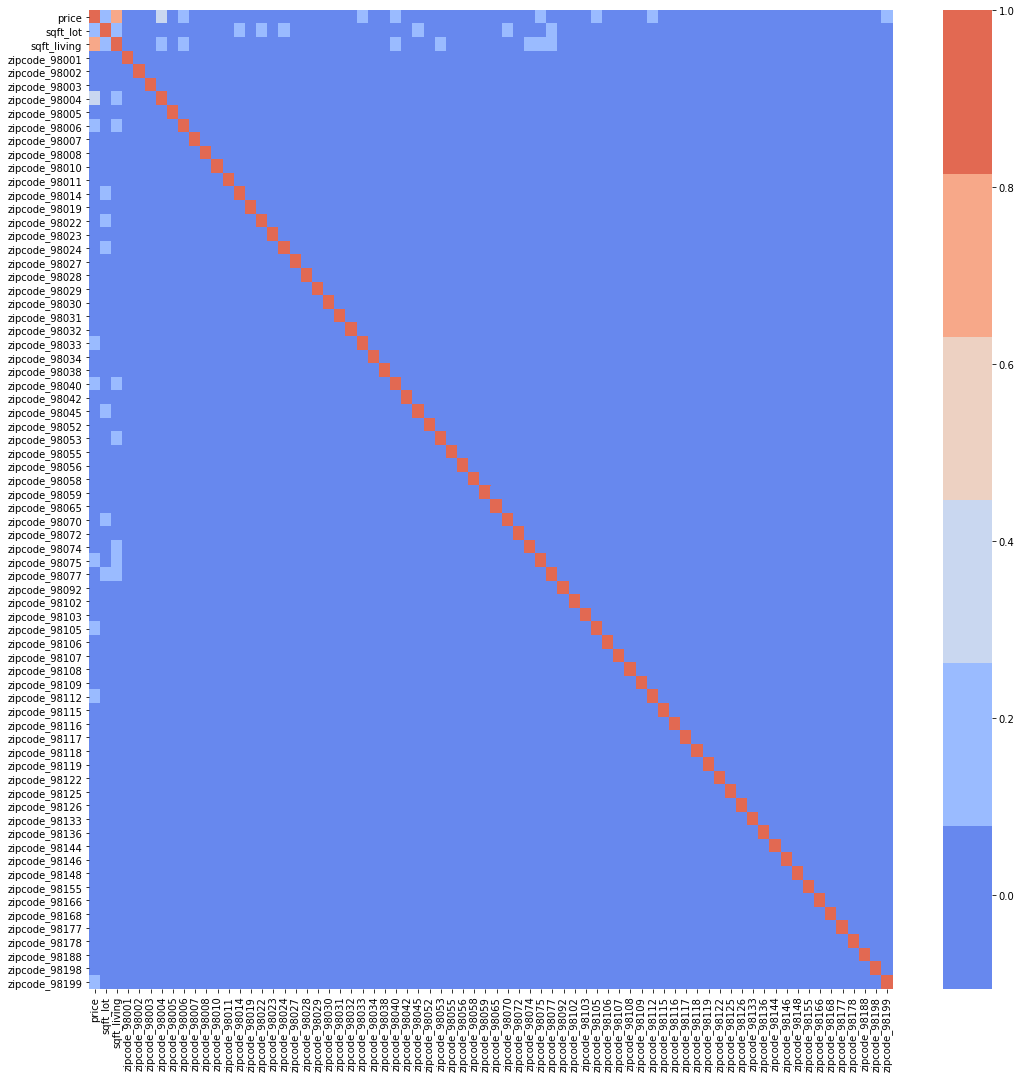

In [41]:
#Heatmap to check multicollinearity
corr = df_model.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

In [50]:
continuous_columns = ['price', 'sqft_lot', 'sqft_living']

In [42]:
#Generate model #1
y= df_model['price']
x= df_model.drop(['price'], axis=1)
X=sm.add_constant(x)

linreg = sm.OLS(y,X).fit()
linreg.summary()

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     817.3
Date:                Wed, 24 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:26:21   Log-Likelihood:            -2.9084e+05
No. Observations:               21420   AIC:                         5.818e+05
Df Residuals:                   21348   BIC:                         5.824e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.215e+06    2.8e+04     43.443      0.000    1.16e+06    1.27e+06
sqft_lot          0.3065      0.034      8.914      0.000       0.239       0.374
sqft_living     250.5512      1.597    156.932      0.000     247.422     253.681
zipcode_98001 -1.417e+06   2.93e+04    -48.388      0.000   -1.47e+06   -1.36e+06
zipcode_98002 -1.391e+06   3.07e+04    -45.298      0.000   -1.45e+06   -1.33e+06
zipcode_98003 -1.408e+06   2.98e+04    -47.282      0.000   -1.47e+06   -1.35e+06
zipcode_98004 -5.934e+05   2.94e+04    -20.192      0.000   -6.51e+05   -5.36e+05
zipcode_98005 -1.077e+06   3.11e+04    -34.633      0.000   -1.14e+06   -1.02e+06
zipcode_98006 -1.085e+06   2.87e+04    -37.849      0.000   -1.14e+06   -1.03e+06
zipcode_98007 -1.149e+06   3.19e+04    -36.065      0.000   -1.21e+06   -1.09e+06
zipcode_98008 -1.107e+06   2.97e+04    -37.286      0.000   -1.17e+06   -1.05e+06
zipcode_98010 -1.344e+06   3.35e+04    -40.060      0.000   -1.41e+06   -1.28e+06
zipcode_98011 -1.294e+06   3.07e+04    -42.188      0.000   -1.35e+06   -1.23e+06
zipcode_98014 -1.321e+06   3.26e+04    -40.558      0.000   -1.38e+06   -1.26e+06
zipcode_98019 -1.347e+06   3.08e+04    -43.783      0.000   -1.41e+06   -1.29e+06
zipcode_98022 -1.382e+06   3.03e+04    -45.592      0.000   -1.44e+06   -1.32e+06
zipcode_98023 -1.432e+06   2.88e+04    -49.749      0.000   -1.49e+06   -1.38e+06
zipcode_98024 -1.254e+06    3.5e+04    -35.828      0.000   -1.32e+06   -1.19e+06
zipcode_98027 -1.239e+06    2.9e+04    -42.746      0.000    -1.3e+06   -1.18e+06
zipcode_98028 -1.289e+06   2.97e+04    -43.399      0.000   -1.35e+06   -1.23e+06
zipcode_98029 -1.177e+06   2.94e+04    -40.014      0.000   -1.24e+06   -1.12e+06
zipcode_98030 -1.416e+06      3e+04    -47.226      0.000   -1.47e+06   -1.36e+06
zipcode_98031 -1.403e+06   2.98e+04    -47.034      0.000   -1.46e+06   -1.34e+06
zipcode_98032 -1.405e+06   3.25e+04    -43.274      0.000   -1.47e+06   -1.34e+06
zipcode_98033 -1.011e+06   2.89e+04    -34.959      0.000   -1.07e+06   -9.54e+05
zipcode_98034 -1.193e+06   2.87e+04    -41.606      0.000   -1.25e+06   -1.14e+06
zipcode_98038 -1.395e+06   2.86e+04    -48.846      0.000   -1.45e+06   -1.34e+06
zipcode_98040 -8.031e+05   2.96e+04    -27.126      0.000   -8.61e+05   -7.45e+05
zipcode_98042 -1.406e+06   2.87e+04    -49.067      0.000   -1.46e+06   -1.35e+06
zipcode_98045 -1.309e+06   3.04e+04    -43.076      0.000   -1.37e+06   -1.25e+06
zipcode_98052 -1.166e+06   2.85e+04    -40.839      0.000   -1.22e+06   -1.11e+06
zipcode_98053 -1.207e+06    2.9e+04    -41.603      0.000   -1.26e+06   -1.15e+06
zipcode_98055 -1.363e+06   2.99e+04    -45.500      0.000   -1.42e+06    -1.3e+06
zipcode_98056 -1.302e+06   2.91e+04    -44.807      0.000   -1.36e+06   -1.25e+06
zipcode_98058 -1.382e+06   2.89e+04    -47.835   

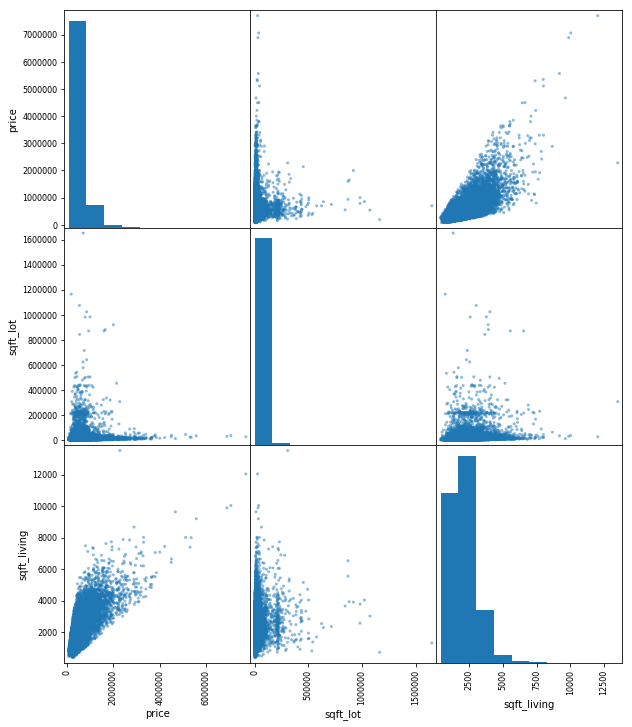

In [44]:
pd.plotting.scatter_matrix(df_model[['price', 'sqft_lot', 'sqft_living']], figsize=(10,12));

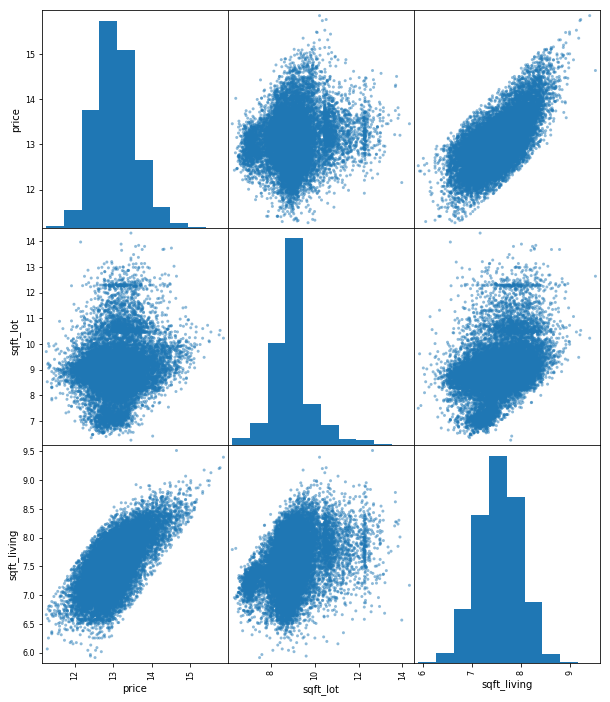

In [45]:
#Log transform continuous variables to check if skeweness and kurtosis get better
for feat in continuous_columns:
    df_model[feat] = df_model[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_model[['price', 'sqft_lot', 'sqft_living']], figsize=(10,12));

In [46]:
#Generate model #2
y= df_model['price']
x= df_model.drop(['price'], axis=1)
X=sm.add_constant(x)

linreg = sm.OLS(y,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1424.
Date:                Wed, 24 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:48:55   Log-Likelihood:                 2048.3
No. Observations:               21420   AIC:                            -3953.
Df Residuals:                   21348   BIC:                            -3379.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0393      0.047    172.310      0.000       7.948       8.131
sqft_lot          0.0707      0.002     32.623      0.000       0.066       0.075
sqft_living       0.7055      0.004    172.563      0.000       0.697       0.713
zipcode_98001    -1.4914      0.034    -44.313      0.000      -1.557      -1.425
zipcode_98002    -1.5067      0.035    -42.650      0.000      -1.576      -1.437
zipcode_98003    -1.4406      0.034    -42.063      0.000      -1.508      -1.374
zipcode_98004    -0.2516      0.034     -7.434      0.000      -0.318      -0.185
zipcode_98005    -0.6834      0.036    -19.096      0.000      -0.754      -0.613
zipcode_98006    -0.7086      0.033    -21.457      0.000      -0.773      -0.644
zipcode_98007    -0.7847      0.037    -21.403      0.000      -0.857      -0.713
zipcode_98008    -0.7668      0.034    -22.446      0.000      -0.834      -0.700
zipcode_98010    -1.2456      0.039    -32.285      0.000      -1.321      -1.170
zipcode_98011    -1.0225      0.035    -28.983      0.000      -1.092      -0.953
zipcode_98014    -1.1991      0.037    -32.083      0.000      -1.272      -1.126
zipcode_98019    -1.1798      0.035    -33.366      0.000      -1.249      -1.111
zipcode_98022    -1.3922      0.035    -40.050      0.000      -1.460      -1.324
zipcode_98023    -1.4875      0.033    -44.945      0.000      -1.552      -1.423
zipcode_98024    -1.0602      0.040    -26.361      0.000      -1.139      -0.981
zipcode_98027    -0.9178      0.033    -27.535      0.000      -0.983      -0.852
zipcode_98028    -1.0555      0.034    -30.890      0.000      -1.122      -0.988
zipcode_98029    -0.7846      0.034    -23.146      0.000      -0.851      -0.718
zipcode_98030    -1.4327      0.034    -41.559      0.000      -1.500      -1.365
zipcode_98031    -1.4065      0.034    -41.013      0.000      -1.474      -1.339
zipcode_98032    -1.5048      0.037    -40.303      0.000      -1.578      -1.432
zipcode_98033    -0.6186      0.033    -18.591      0.000      -0.684      -0.553
zipcode_98034    -0.9107      0.033    -27.629      0.000      -0.975      -0.846
zipcode_98038    -1.3037      0.033    -39.708      0.000      -1.368      -1.239
zipcode_98040    -0.4290      0.034    -12.580      0.000      -0.496      -0.362
zipcode_98042    -1.4011      0.033    -42.523      0.000      -1.466      -1.336
zipcode_98045    -1.1506      0.035    -32.939      0.000      -1.219      -1.082
zipcode_98052    -0.7903      0.033    -24.058      0.000      -0.855      -0.726
zipcode_98053    -0.8519      0.033    -25.525      0.000      -0.917      -0.786
zipcode_98055    -1.3269      0.034    -38.524      0.000      -1.394      -1.259
zipcode_98056    -1.1237      0.033    -33.614      0.000      -1.189      -1.058
zipcode_98058    -1.3086      0.033    -39.395   

In [49]:
#Formula to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [53]:
#Remove outliers from continuous variables
for column in continuous_columns:
    df_model = remove_outlier(df_model, column)

In [55]:
#Generate model #3
y= df_model['price']
x= df_model.drop(['price'], axis=1)
X=sm.add_constant(x)

linreg = sm.OLS(y,X).fit()
linreg.summary()

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1235.
Date:                Wed, 24 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:08:46   Log-Likelihood:                 3053.7
No. Observations:               18445   AIC:                            -5963.
Df Residuals:                   18373   BIC:                            -5400.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.3856      0.063    133.299      0.000       8.262       8.509
sqft_lot          0.0521      0.004     14.055      0.000       0.045       0.059
sqft_living       0.6648      0.004    156.880      0.000       0.656       0.673
zipcode_98001    -1.3674      0.046    -29.539      0.000      -1.458      -1.277
zipcode_98002    -1.3836      0.047    -29.264      0.000      -1.476      -1.291
zipcode_98003    -1.3164      0.047    -28.249      0.000      -1.408      -1.225
zipcode_98004    -0.1687      0.047     -3.616      0.000      -0.260      -0.077
zipcode_98005    -0.5447      0.048    -11.260      0.000      -0.640      -0.450
zipcode_98006    -0.5866      0.046    -12.781      0.000      -0.677      -0.497
zipcode_98007    -0.6585      0.048    -13.642      0.000      -0.753      -0.564
zipcode_98008    -0.6583      0.047    -14.128      0.000      -0.750      -0.567
zipcode_98010    -1.1515      0.052    -21.997      0.000      -1.254      -1.049
zipcode_98011    -0.8870      0.047    -18.754      0.000      -0.980      -0.794
zipcode_98014    -1.0951      0.052    -21.182      0.000      -1.196      -0.994
zipcode_98019    -1.0435      0.048    -21.839      0.000      -1.137      -0.950
zipcode_98022    -1.3122      0.048    -27.471      0.000      -1.406      -1.219
zipcode_98023    -1.3594      0.046    -29.654      0.000      -1.449      -1.270
zipcode_98024    -0.9625      0.059    -16.340      0.000      -1.078      -0.847
zipcode_98027    -0.6869      0.047    -14.663      0.000      -0.779      -0.595
zipcode_98028    -0.9202      0.047    -19.757      0.000      -1.012      -0.829
zipcode_98029    -0.6586      0.047    -14.147      0.000      -0.750      -0.567
zipcode_98030    -1.3079      0.047    -27.967      0.000      -1.400      -1.216
zipcode_98031    -1.2824      0.047    -27.490      0.000      -1.374      -1.191
zipcode_98032    -1.3687      0.049    -28.105      0.000      -1.464      -1.273
zipcode_98033    -0.5046      0.046    -10.968      0.000      -0.595      -0.414
zipcode_98034    -0.8024      0.046    -17.533      0.000      -0.892      -0.713
zipcode_98038    -1.1882      0.046    -25.925      0.000      -1.278      -1.098
zipcode_98040    -0.3288      0.047     -7.046      0.000      -0.420      -0.237
zipcode_98042    -1.2819      0.046    -27.941      0.000      -1.372      -1.192
zipcode_98045    -1.0289      0.048    -21.490      0.000      -1.123      -0.935
zipcode_98052    -0.6546      0.046    -14.310      0.000      -0.744      -0.565
zipcode_98053    -0.6824      0.047    -14.635      0.000      -0.774      -0.591
zipcode_98055    -1.2071      0.047    -25.803      0.000      -1.299      -1.115
zipcode_98056    -1.0059      0.046    -21.839      0.000      -1.096      -0.916
zipcode_98058    -1.1815      0.046    -25.678   